In [2]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
e          = 1.602e-19              # 1 eV = 1.602e-19 J
ħ          = 0.6582119514           # [eV fs]
c          = 299792458              # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = ħ*ħ*c_nmfs*c_nmfs/2/me # eV nm^2

# Number of points in the mesh
N    = 2**12+1
xinf = 100.0             # nm
ℓ    = 10.0               # nm
ℓ2   = 10.0               # nm

x    = linspace(-xinf,xinf,N)
Δx   = x[1]-x[0]

V0   = 0.5              # eV

V        = zeros(N)
index    = logical_and( x<-ℓ, x>-ℓ-ℓ2)
V[index] = V0
index    = logical_and( x>ℓ, x<ℓ+ℓ2)
V[index] = V0

Mdd      = 1./(Δx*Δx)*( diag(ones(N-1),-1) -2*diag(ones(N),0) + diag(ones(N-1),1))
H        = -Eλ*Mdd + diag(V)
E,ψT     = eigh(H)
ψ        = transpose(ψT)

In [4]:
index = E<V0

[49 50 51 52]
49
50
51
52


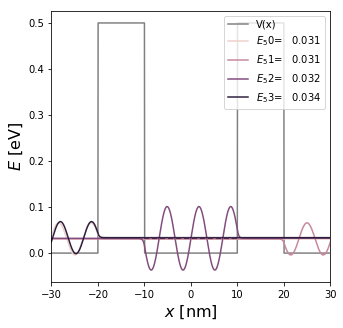

In [15]:
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

# axes.set_xlim(-40*ℓ,40*ℓ)
axes.set_xlim(-30,30)

axes.plot(x,V,c="Gray",label="V(x)")


index = E<V0
itera = [i for i, x in enumerate(index) if x]
ini   = 49 
itera = arange(ini,ini+4)
print (itera)

num_shades = len(itera)
color_list = sns.cubehelix_palette(num_shades)

for i in itera:
    print (i)
    axes.plot(x,E[i]+ψ[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i-ini])

for i in itera:
    axes.plot([-ℓ,ℓ],[E[i],E[i]],'--',c=color_list[i-ini])

#axes.set_ylim(0,0.1)

axes.set_xlabel("$x$ [nm]",fontsize=16)
axes.set_ylabel("$E$ [eV]",fontsize=16)

axes.legend(loc=1)
# fig.tight_layout()